<h1>시각인지</h1>

In [1]:
# 라이브러리
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터셋
mnist = tf.keras.datasets.mnist
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()
print( xtrain.shape, xtest.shape )

(60000, 28, 28) (10000, 28, 28)


# 탐색적 데이터 분석

<Figure size 640x480 with 0 Axes>

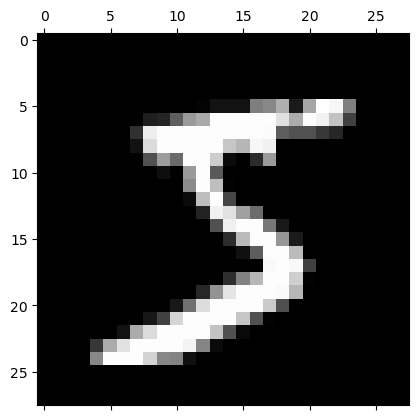

In [3]:
# 샘플 데이터
plt.gray()
plt.matshow( xtrain[0] )
plt.show()

In [4]:
print( xtrain.max(), xtrain.min() )

255 0


In [5]:
# 전처리: min-max normalization
xtrain, xtest = xtrain/255.0, xtest/255.0

In [6]:
np.unique( ytrain, return_counts=True )

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

# CNN 모델

모델 정의

In [7]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Input(shape=(28,28,1)) )
model.add( tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu') )
model.add( tf.keras.layers.MaxPooling2D(pool_size=(2,2)) )
model.add( tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu') )
model.add( tf.keras.layers.MaxPooling2D(pool_size=(2,2)) )
model.add( tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu') )
model.add( tf.keras.layers.Flatten() )
model.add( tf.keras.layers.Dense(units=64, activation='relu') )
model.add( tf.keras.layers.Dense(units=10, activation='softmax') )

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

모델 훈련과 평가

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [10]:
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1471 - accuracy: 0.9548
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0461 - accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0339 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0247 - accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0196 - accuracy: 0.9936


In [11]:
model.evaluate( xtest, ytest )

313/313 [==============================] - 1s 3ms/step - loss: 0.0300 - accuracy: 0.9924


[0.029956070706248283, 0.9923999905586243]

# 사전 학습 모델의 사용

In [12]:
# VGG16 model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
model = VGG16()

이미지 데이터 준비

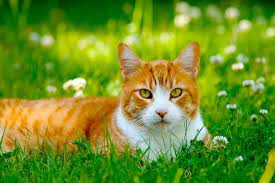

In [13]:
img = image.load_img('cat.jpeg')
img

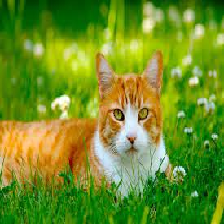

In [14]:
img = image.load_img('cat.jpeg', target_size=(224,224))
img

In [15]:
# 이미지 데이터를 3D텐서 데이터로 변환
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


예측

In [16]:
preds = model.predict(x)  # 1,000 개의 클래스에 대한 확률

1/1 [==============================] - 0s 239ms/step


In [17]:
print('Predicted:', decode_predictions(preds, top=3)[0])

# 상위 세 개 예측값

Predicted: [('n02123159', 'tiger_cat', 0.95922863), ('n02123045', 'tabby', 0.021420263), ('n02124075', 'Egyptian_cat', 0.0064157667)]


# 연습문제

1. 아래와 같이 Fashion MNIST 데이터를 이용하여 물음에 답하시오.<br>
(1) 훈련데이터와 평가데이터는 각각 몇 개인가? <br>
(2) 하나의 이미지 샘플의 크기는 얼마인가? 하나의 데이터를 이미지로 그려서 표현하시오.<br>
(3) 훈련데이터의 레이블은 총 몇 개가 있는가?<br>
(4) 각 레이블에 해당하는 샘플의 수는 평균적으로 몇 개인가?<br>
(5) Conv(32,(3,3),relu) - MaxPooling((2,2)) - Conv(32,(3,3),relu) - FC(64,relu) - FC(<레이블의 수>,softmax) 의 CNN 모델을 구성하시오. 모두 몇 개의 파라메터로 이루어져 있는가?<br>
(6) 위의 모델을 훈련데이터를 이용해 훈련하고, 평가데이터를 이용해 평가하시오. 정확도는 얼마인가?<br>
(7) 정확도를 높이기 위해 모델을 변경하시오 (레이어 추가/삭제, 필터 수 및 사이즈 변경 등). 가장 높은 정확도는 얼마를 얻을 수 있는가?<br>

In [18]:
data = tf.keras.datasets.fashion_mnist
(xtrain,ytrain), (xtest,ytest) = data.load_data()

In [19]:
# (1) 훈련데이터와 평가데이터는 각각 몇 개인가?
print( xtrain.shape, xtest.shape )

(60000, 28, 28) (10000, 28, 28)


하나의 이미지 샘플 크기: (28, 28)


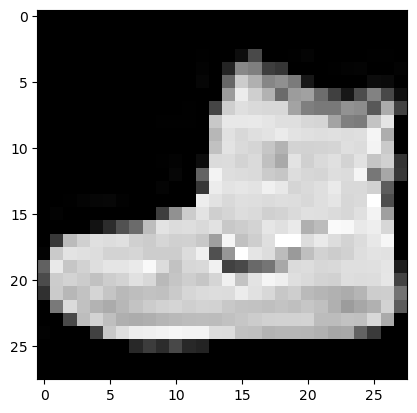

In [20]:
# (2) 하나의 이미지 샘플의 크기는 얼마인가? 하나의 데이터를 이미지로 그려서 표현하시오
print(f"하나의 이미지 샘플 크기: {xtrain.shape[1:]}")
plt.imshow(xtrain[0], cmap='gray')
plt.show()

In [21]:
# (3) 훈련데이터의 레이블은 총 몇 개가 있는가?<br>
num_classes = len(np.unique(ytrain))
print(f"훈련 데이터의 레이블 개수: {num_classes}")

훈련 데이터의 레이블 개수: 10


In [22]:
# (4) 각 레이블에 해당하는 샘플의 수는 평균적으로 몇 개인가?<br>
_, counts = np.unique(ytrain, return_counts=True)
average_samples_per_class = counts.mean()
print(f"각 레이블에 해당하는 샘플의 수 평균: {average_samples_per_class}")

각 레이블에 해당하는 샘플의 수 평균: 6000.0


In [23]:
# (5) Conv(32,(3,3),relu) - MaxPooling((2,2)) - Conv(32,(3,3),relu) - FC(64,relu) - FC(<레이블의 수>,softmax) 의 CNN 모델을 구성하시오. 모두 몇 개의 파라메터로 이루어져 있는가?<br>
    
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Input(shape=(28,28,1)) )
model.add( tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu') )
model.add( tf.keras.layers.MaxPooling2D(pool_size=(2,2)) )
model.add( tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu') )
model.add( tf.keras.layers.Flatten() )  
model.add( tf.keras.layers.Dense(units=64, activation='relu') )
model.add( tf.keras.layers.Dense(units=10, activation='softmax') )
    





In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 3872)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                247872    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                      

In [25]:
# (6) 위의 모델을 훈련데이터를 이용해 훈련하고, 평가데이터를 이용해 평가하시오. 정확도는 얼마인가?<br>
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [26]:
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5658 - accuracy: 0.8364
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3090 - accuracy: 0.8874
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2664 - accuracy: 0.9005
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2372 - accuracy: 0.9117
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2076 - accuracy: 0.9221


In [27]:
model.evaluate( xtest, ytest )

313/313 [==============================] - 1s 3ms/step - loss: 0.3203 - accuracy: 0.8984


[0.3202647566795349, 0.8984000086784363]

In [28]:
# (7) 정확도를 높이기 위해 모델을 변경하시오 (레이어 추가/삭제, 필터 수 및 사이즈 변경 등). 가장 높은 정확도는 얼마를 얻을 수 있는가?<br>

2. VGG16 모델을 이용하여 다른 사진을 분류해 보시오. 예상대로 결과나 나타나는가? 다음의 웹페이지를 참고하여 다른 사전 학습 모델도 적용해보시오.<br>
https://keras.io/api/applications/#usage-examples-for-image-classification-models

In [29]:
model = VGG16()

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [32]:
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "vgg16" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 28, 28)


In [ ]:
model.evaluate( xtest, ytest )